<a href="https://colab.research.google.com/github/DavidMedeiros/ComposicaoPolimorfica/blob/master/Lab_2_RecInfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [416]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

import nltk
from nltk.tokenize import RegexpTokenizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Funções Auxiliares


In [0]:
"""
  Verifica se há numeros na string 
"""
def hasNumbers(inputString):
  return bool(re.search(r'\d', inputString))

"""
  Retorna o número de palavras que ocorrem n vezes
"""
def number_words_ocurring_n_times(n):
  words_ocurring = 0
  
  for token_occurrence in tokens_frequencies.items():
    if (token_occurrence[1] == n):
      words_ocurring = words_ocurring + 1
  
  return words_ocurring

# Questão 1

Para esta questão, percorremos o campo texto do [CSV](https://raw.githubusercontent.com/DavidMedeiros/ri_lab_01/master/output/results.csv) do lab passado e extraímos tokens, eliminando pontuações, caracteres especiais e números. Em seguida, foi calculado algumas estatísticas e mostradas na tabela_4_1 de resultado.



In [418]:
dataset_url = 'https://raw.githubusercontent.com/DavidMedeiros/ri_lab_01/master/output/results.csv'
csv = pandas.read_csv(dataset_url)
documents = csv['text']

tokens = []
tokens_filtered= []

toker = RegexpTokenizer(r'\w+')

for document in documents:
  tokens = tokens + toker.tokenize(document.lower())

for token in tokens:
  if token and not hasNumbers(token):
    tokens_filtered.append(token)
    
tokens_frequencies = nltk.FreqDist(tokens_filtered)

total_documents = len(documents)
total_word_ocurrences = len(tokens_filtered)
vocabulary_size = len(set(tokens_filtered))
words_ocurring_mt_thousand_times = 0
words_ocurring_once = number_words_ocurring_n_times(1)

for token_occurrence in tokens_frequencies.items():
  if (token_occurrence[1] > 1000):
    words_ocurring_mt_thousand_times = words_ocurring_mt_thousand_times + 1

table_4_1 = pandas.DataFrame(data={'names':['Total Documents', 
                                          'Total word ocurrences', 
                                          'Vocabulary size', 
                                          'Words occurring > 1000 times', 
                                          'Words occurring once'], 
                                 'ocurrences':[total_documents, 
                                               total_word_ocurrences, 
                                               vocabulary_size, 
                                               words_ocurring_mt_thousand_times, 
                                               words_ocurring_once]})

table_4_1

,names,ocurrences
0,Total Documents,105
1,Total word ocurrences,33727
2,Vocabulary size,6286
3,Words occurring > 1000 times,3
4,Words occurring once,3271


# Questão 2
A saída desta questão tem a tabela_4_2 como resultado, exibindo as top 50 frequências, além do ranking, probabilidade e probabilidade * rank de uma determinada palavra. 

A frequência é a quantidade de ocorrências daquela palavra nos tokens encontrados. O rank classifica essas frequencias da maior para a menor. Já a probabilidade é a frequência sobre o total de ocorrências daquela palavra. A última coluna mostra o rank multiplicado por esta probabilidade encontrada.


In [419]:
words = pandas.DataFrame(tokens_filtered, columns=['word'])
table_4_2 = words.word.value_counts().reset_index()
table_4_2.columns = ['word', 'freq']
table_4_2['r'] = table_4_2.freq.rank(ascending=False, method='first')

pr = table_4_2.freq / total_word_ocurrences * 100
rpr = table_4_2.r * pr / 100

table_4_2['Pr %'] = round(pr, 2)
table_4_2['r.Pr'] = round(rpr, 3)

table_4_2[0:50]

,word,freq,r,Pr %,r.Pr
0,de,1603,1.0,4.75,0.048
1,o,1217,2.0,3.61,0.072
2,a,1204,3.0,3.57,0.107
3,que,945,4.0,2.80,0.112
4,e,847,5.0,2.51,0.126
5,do,730,6.0,2.16,0.130
6,da,605,7.0,1.79,0.126
7,em,491,8.0,1.46,0.116
8,para,367,9.0,1.09,0.098
9,no,355,10.0,1.05,0.105


# Questão 3
São exibidos dois gráficos (rank vs. frequencia) , um para as palavras encontradas e outro para os bigramas presentes nos textos. Os pontos azuis representam o rank da palavra e a sua frequência. Já a reta em verde representa o **valor de C para o melhor ajuste. Neste caso, calculamos a média de R*PR para estimar c.**


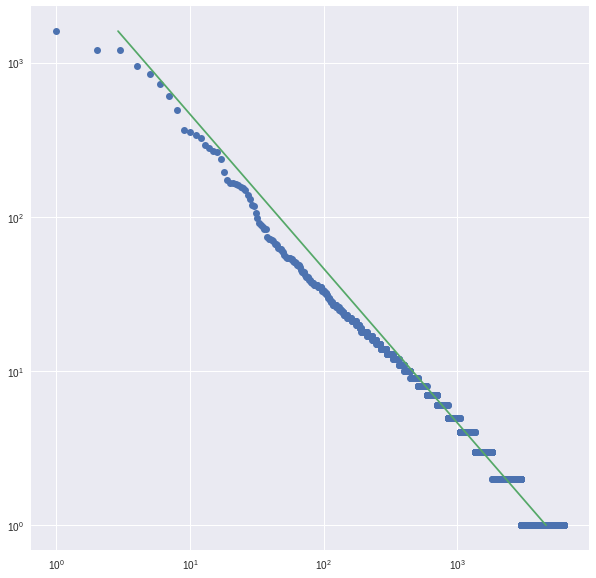

In [420]:
table_4_2['pred'] = np.mean(rpr) / pr * 100 

%matplotlib inline

f, ax = plt.subplots(figsize=(10, 10))
ax.set(xscale="log", yscale="log")

plt.plot(table_4_2['r'], table_4_2['freq'], linestyle="", marker='o')
plt.plot(table_4_2['pred'], table_4_2['freq'], linestyle="-", marker='')
plt.show()

In [0]:
bigrams_tuples = []
bigrams_words = []

for document in documents:
  bigram_tokens = []
  
  for token in toker.tokenize(document.lower()):
    if token and not hasNumbers(token):
      bigram_tokens.append(token)  
      
  bigrams_tuples = bigrams_tuples + list(nltk.bigrams(bigram_tokens))

for bigram in bigrams_tuples:
  bigrams_words.append(bigram[0] + ' ' + bigram[1])

bigrams = pandas.DataFrame(bigrams_words, columns=['bigram'])
bigrams_counts = bigrams.bigram.value_counts().reset_index()
bigrams_counts.columns = ['bigram', 'freq']
bigrams_counts['r'] = bigrams_counts.freq.rank(ascending=False, method='first')
 

pr_bigrams = bigrams_counts.freq / len(bigrams_words) * 100
rpr_bigrams = bigrams_counts.r * pr_bigrams / 100

bigrams_counts['pred'] = np.mean(rpr_bigrams) / pr_bigrams * 100 
  

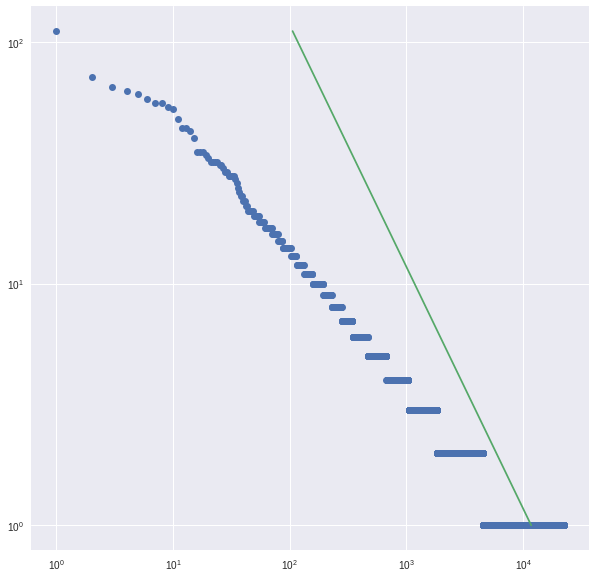

In [422]:
%matplotlib inline

f, ax = plt.subplots(figsize=(10, 10))
ax.set(xscale="log", yscale="log")
plt.plot(bigrams_counts['r'], bigrams_counts['freq'], linestyle="", marker='o')
plt.plot(bigrams_counts['pred'], bigrams_counts['freq'], linestyle="-", marker='')
plt.show()

# Questão 4

A questão apresenta o resultado da tabela_4_5 que exibe estatísticas sobre predições de proporções, com a real proporção calculada, para um dado número de palavras com certa ocorrência. Além disso, a coluna 'Actual number of words' exibe o número de palavras que ocorrem n vezes, calculado pela função auxiliar number_word_ocurring_n_times(n).

In [423]:

number_of_ocurrences = [1,2,3,4,5,6,7,8,9,10]
predicted_proportions = []
actual_proportions = []
actual_number_of_words = []

for n in number_of_ocurrences:
  predicted_proportion = 1.0 / (n * (n + 1))
  number_word_ocurring_n_times = number_words_ocurring_n_times(n)
  actual_proportion = number_word_ocurring_n_times / vocabulary_size
  
  predicted_proportions.append(round(predicted_proportion, 3))
  actual_proportions.append(round(actual_proportion, 3))
  actual_number_of_words.append(number_word_ocurring_n_times)

table_4_5 = pandas.DataFrame(number_of_ocurrences, columns=['Number of ocurrences'])

table_4_5['Predicted proportion'] = predicted_proportions

table_4_5['Actual proportion'] = actual_proportions

table_4_5['Actual number of words'] = actual_number_of_words

table_4_5

,Number of ocurrences,Predicted proportion,Actual proportion,Actual number of words
0,1,0.500,0.520,3271
1,2,0.167,0.187,1176
2,3,0.083,0.077,486
3,4,0.050,0.049,308
4,5,0.033,0.031,196
5,6,0.024,0.023,142
6,7,0.018,0.018,116
7,8,0.014,0.013,83
8,9,0.011,0.010,62
9,10,0.009,0.007,45
